In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

In [2]:
yeast = pd.read_csv('yeast.csv')

In [3]:
yeast.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [4]:
yeast.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [5]:
yeast['name'].value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: name, dtype: int64

In [6]:
yeast.isna().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

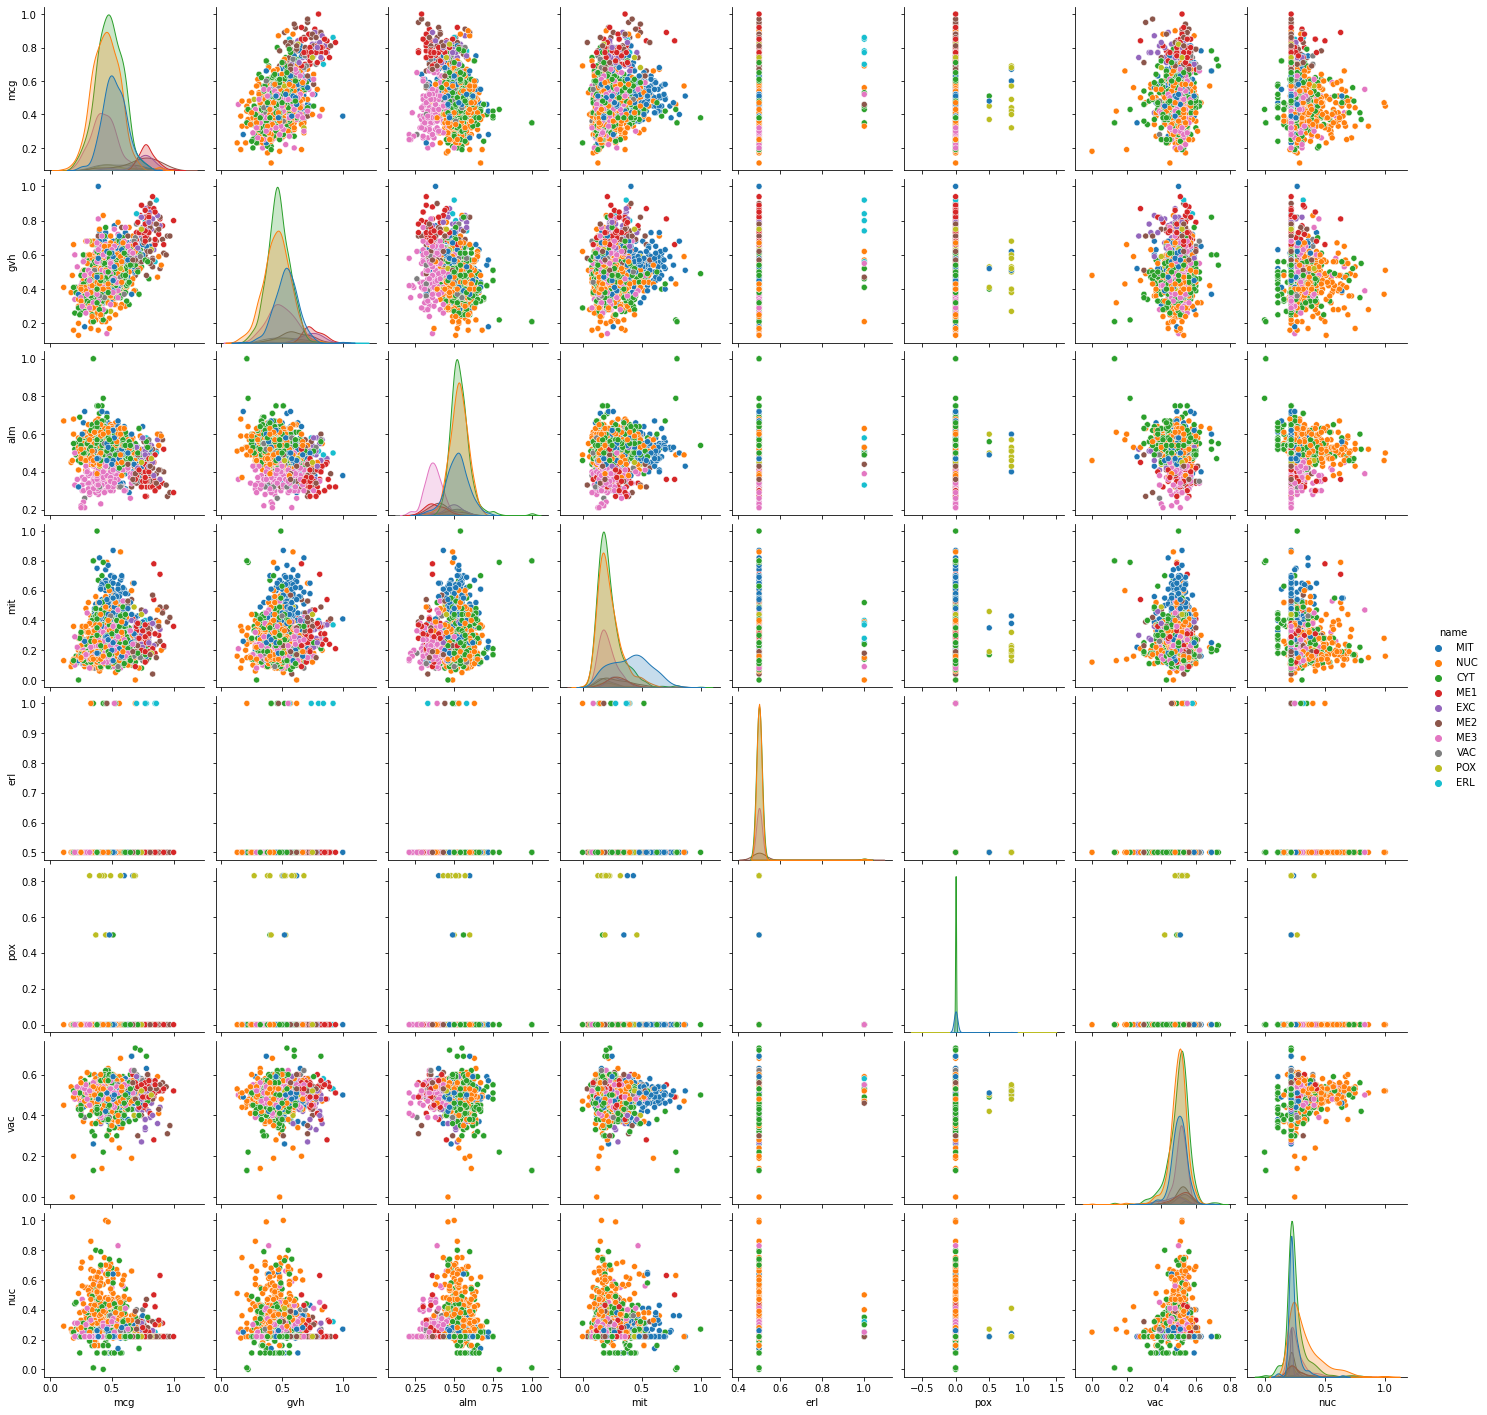

In [7]:
sns.pairplot(yeast,hue="name")

In [8]:
X = yeast.drop(['name'], axis=1)
y = yeast['name']
X_treino, X_teste, y_treino, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

## Abordagem 1:
Utilizar da codificação da coluna Name para que possa ser tratada pelo modelo de Regressão Logistica.

In [10]:
#Codificando os dados categóricos
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
yeast["name"]=LabelEncoder().fit_transform(yeast["name"].values)
yeast.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


In [11]:
#Separando-os em features e target
X = yeast.drop(['name'], axis=1)
y = yeast['name']
X_treino, X_teste, y_treino, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [12]:
#Definindo o modelo e fazendo o fit dos dados
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_treino, y_treino)

LogisticRegression(max_iter=1000)

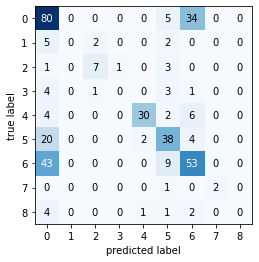

In [13]:
#Passando os dados de teste para previsão do modelo, e checagem da matriz de confusão gerada
y_pred = modelo_lr.predict(X_teste)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [14]:
#Conferindo métricas de precisão
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57       119
           2       0.00      0.00      0.00         9
           3       0.70      0.58      0.64        12
           4       0.00      0.00      0.00         9
           5       0.91      0.71      0.80        42
           6       0.59      0.59      0.59        64
           7       0.53      0.50      0.52       105
           8       1.00      0.67      0.80         3
           9       0.00      0.00      0.00         8

    accuracy                           0.57       371
   macro avg       0.47      0.42      0.44       371
weighted avg       0.55      0.57      0.55       371



C:\Users\Tiago\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tiago\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tiago\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Abordagem 2
Classificação por Árvore de Decisões

In [16]:
from sklearn.tree import DecisionTreeClassifier
modelo_ad=DecisionTreeClassifier(random_state=42)
modelo_ad.fit(X_treino,y_treino)

DecisionTreeClassifier(random_state=42)

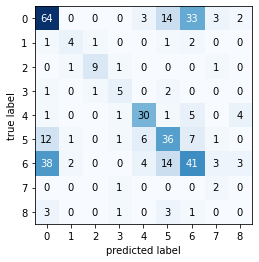

In [17]:
y_pred2 = modelo_ad.predict(X_teste)
cm = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [18]:
accuracy = accuracy_score(y_test, y_pred2)
print("Acurácia:", accuracy)


Acurácia: 0.5148247978436657


In [19]:
!git remote add origin https://github.com/orville-wilcox/ML1Aula2.git
!git branch -M main
!git push -u origin main

error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/orville_wilcox/teste_aula_GIT_ada'
